# Spectra_lib: A Quick Tour

This notebook provides some examples of the main functions available in the library.  
Without further explanation, let's look at a typical header of a program that uses Spectra_lib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Spectra_lib import Spectra
spec = Spectra()

Spectra functions imported


Let's generate two signals, 'x' and 'y', as sinusoids corrupted by additive white uniform noise.

In [2]:
fs= 100000
N = 100000
T = N/fs
# nyquist freq = fs/2 = 5000 Hz
# freq of the signal at least nyquist_freq/2.5 => freq_sig <= 2500 Hz
# at least 10 sample per period are needed to sample a real signal to avoid distortion
freq = 2000
t = np.linspace(0,T,N)
noise1 = np.random.uniform(-0.01, 0.01, N)
noise2 = np.random.uniform(-0.01, 0.01, N)
x = np.sin(2*np.pi*freq*t)+noise1
y = np.sin(2*np.pi*freq*t)+noise2

# FFT

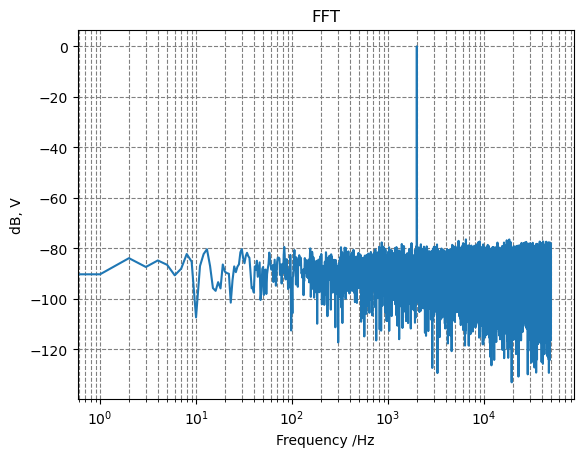

In [3]:
plt.title("FFT")
f, ff = spec.Fft(x, fs, "hann", N)
# logarithmic grid
plt.grid(True, which="both", ls="--", color='gray') 
# fft plot
plt.semilogx(f,20*np.log10(ff))
plt.ylabel(r"dB, V")
plt.xlabel("Frequency /Hz")
plt.show()

# PSD

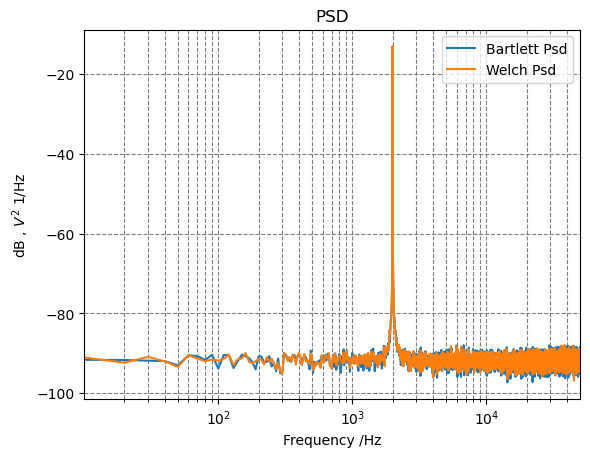

In [4]:
plt.title("PSD")
# PSD of x, Bartlett's method 
f, ps = spec.Psd(x, fs, avg = 10, window = "boxcar", N = int(N/10))
plt.semilogx(f,10*np.log10(abs(ps)),label='Bartlett Psd')
# PSD of Welc's method
f, ps = spec.Psd_Welch(x, fs, avg = 10, window = "boxcar", N = int(N/10))
plt.semilogx(f,10*np.log10(abs(ps)),label='Welch Psd')
# logarithmic grid
plt.grid(True, which="both", ls="--", color='gray')
# labels
plt.ylabel(r"dB , $V^2$ 1/Hz")
plt.xlabel("Frequency /Hz")
plt.xlim(min(f),max(f))
plt.legend()
plt.show()

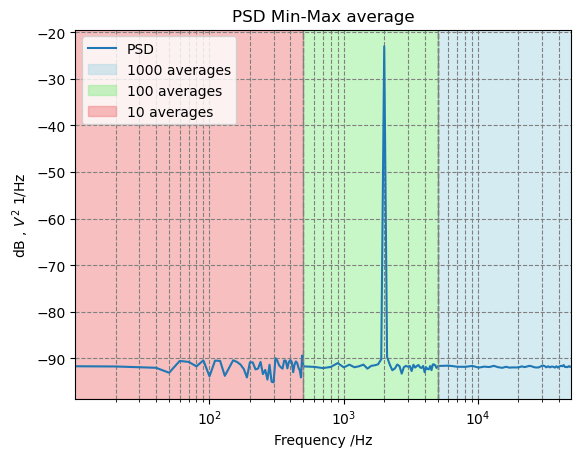

In [9]:
plt.title("PSD Min-Max average")
# PSD with crescent averages
f, ps, avg, dec = spec.Psd_Min_Max(x, fs, 10, 1000, window = "boxcar")
plt.semilogx(f,10*np.log10(abs(ps)),label='PSD')
# For clarity the style is turned on
spec.Avg_dec_col(avg, dec, label = True)
# logarithmic grid
plt.grid(True, which="both", ls="--", color='gray')
# labels
plt.ylabel(r"dB , $V^2$ 1/Hz")
plt.xlabel("Frequency /Hz")
plt.xlim(min(f),max(f))
plt.legend()
plt.show()

# CSD

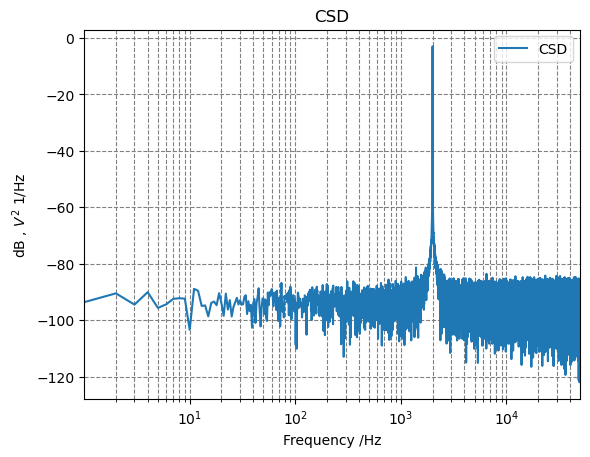

In [ ]:
plt.title("CSD")
# CSD between x and y
# CSD causes a white noise not correlated suppression 
f, ps = spec.Csd(x, y, fs, avg = 1, window = "boxcar", N = int(N/1))
plt.semilogx(f,10*np.log10(abs(ps)),label='CSD')
# logarithmic grid
plt.grid(True, which="both", ls="--", color='gray')
# labels
plt.ylabel(r"dB , $V^2$ 1/Hz")
plt.xlabel("Frequency /Hz")
plt.xlim(min(f),max(f))
plt.legend()
plt.show()

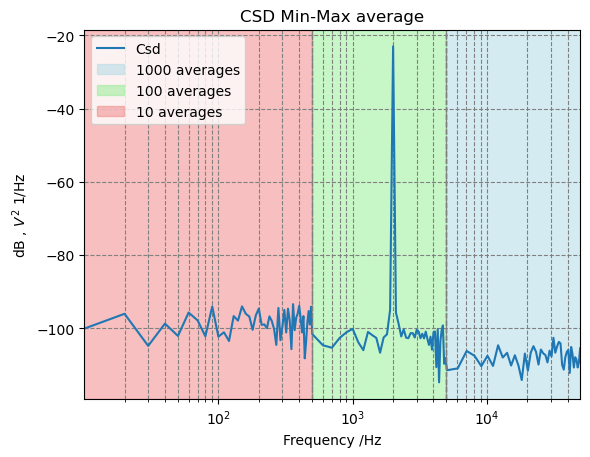

In [ ]:
plt.title("CSD Min-Max average")
# CSD between x and y with crescent averages
# CSD causes a white noise not correlated suppression 
f, ps, avg, dec = spec.Csd_Min_Max(x, y, fs, 10, 1000, window = "boxcar")
plt.semilogx(f,10*np.log10(abs(ps)),label='Csd')
# For clarity the style is turned on
spec.Avg_dec_col(avg, dec, label = True)
# logarithmic grid
plt.grid(True, which="both", ls="--", color='gray')
# labels
plt.ylabel(r"dB , $V^2$ 1/Hz")
plt.xlabel("Frequency /Hz")
plt.xlim(min(f),max(f))
plt.legend()
plt.show()